**Meet Vora,           19BCE299 \
           Taha Firoz Bharucha, 19BCE271**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/My Drive/adult.data"
path1 = "drive/My Drive/adult.test"

Mounted at /content/drive


# .DATA  TO .CSV
### **TRAINING DATA**

In [ ]:
df_train = pd.read_csv(path,header=None)

df_train.columns = ['age','workclass','fnlwgt','education','education_num','marital_satus',
              'occupation','relationship','race','sex','capital_gain','capital_loss',
              'hours_per_week','native_country','class']

df_train = df_train.replace( '[\?,)]',np.nan, regex=True )
  
# storing this dataframe in a csv file
df_train.to_csv('adult_train.csv',index=None)
display(df_train)

,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### **TEST DATA**

In [ ]:
df_test = pd.read_csv(path1,header=None)

df_test.columns = ['age','work_class','fnlwgt','education','education_num','marital_status',
              'occupation','relationship','race','sex','capital_gain','capital_loss',
              'hours_per_week','native_country','class']

df_test = df_test.replace( '[\?,)]',np.nan, regex=True )
  
# storing this dataframe in a csv file
df_test.to_csv('adult_test.csv', index = None)

display(df_test)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# **DATA CLEANING**

In [ ]:
train_bef = df_train.shape
test_bef = df_test.shape
print("The shape of train set(before cleaning) : ",df_train.shape)
print("The shape of test set(before cleaning)  : ",df_test.shape)

The shape of train set(before cleaning) :  (32561, 15)
The shape of test set(before cleaning)  :  (16281, 15)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_satus   32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31964 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   work_class      15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  15998 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


**REMOVING NAN VALUES**

In [ ]:
df_train = df_train.dropna()
df_test  = df_test.dropna()

print("The shape of train set(after removing NAN) : ",df_train.shape)
print("The shape of test set(after removing NAN)  : ",df_test.shape)

The shape of train set(after removing NAN) :  (30148, 15)
The shape of test set(after removing NAN)  :  (15052, 15)


**DUPLICATE DATA**

In [ ]:
duplicate_train = df_train[df_train.duplicated()]
print("Duplicate Rows in training set :")
display(duplicate_train)

Duplicate Rows in training set :


,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [ ]:
duplicate_test = df_test[df_test.duplicated()]
print("Duplicate Rows in test set :")
display(duplicate_test)

Duplicate Rows in test set :


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.


**REMOVING DUPLICATE DATA**

In [ ]:
df_train = df_train.drop_duplicates()
df_test  = df_test.drop_duplicates()

print("The shape of train set(after removing duplicates) : ",df_train.shape)
print("The shape of test set(after removing duplicates)  : ",df_test.shape)

The shape of train set(after removing duplicates) :  (30125, 15)
The shape of test set(after removing duplicates)  :  (15047, 15)


In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
trainAccuracies=dict()
testAccuracies=dict()

**Gender Ratio**

In [ ]:
def precent_plot(df,col,ax):
    ax = sns.countplot(data=df, x=col,order=df[col].value_counts().index)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + p.get_width()*0.4
            y = p.get_y()  + p.get_height()
            ax.annotate(percentage, (x, y))
    plt.show()

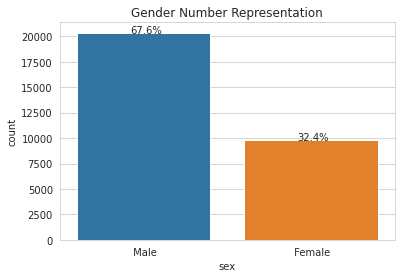

In [ ]:
fig = plt.figure()
ax_1 = fig.add_subplot(111)
plt.title('Gender Number Representation')
precent_plot(df_train,'sex',ax_1)


**Work hour distribution for each gender**

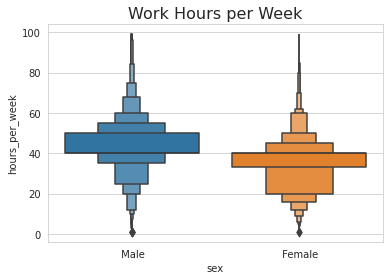

In [ ]:
sns.boxenplot(x='sex',y='hours_per_week',data=df_train)
plt.title("Work Hours per Week",fontsize=16);

**Education of the Workers**

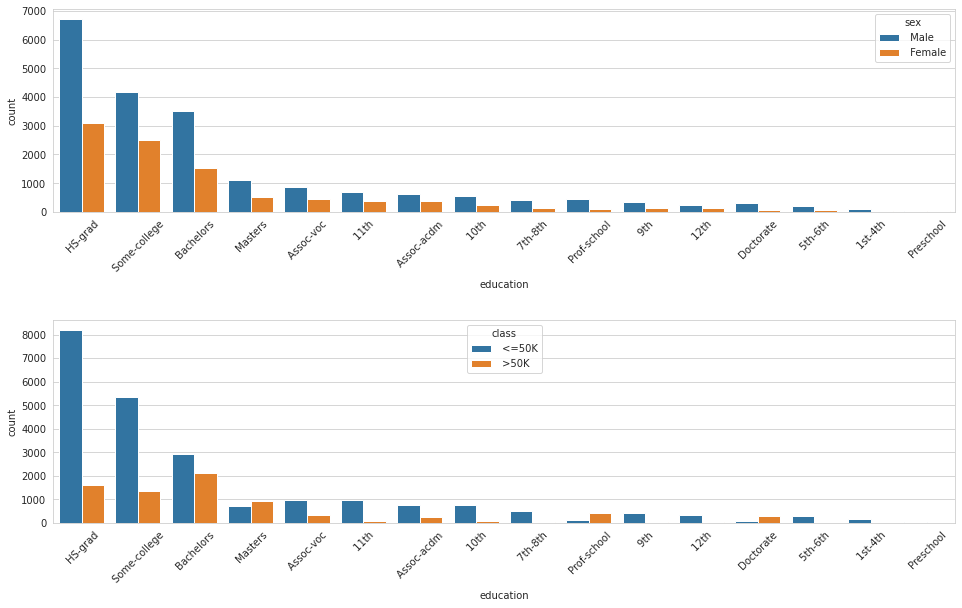

In [ ]:
fig = plt.figure(figsize=(14,8))

ax_1 = fig.add_subplot(211)
sns.countplot(x='education',hue='sex',palette='tab10',order=df_train['education'].value_counts().index,data=df_train,ax=ax_1)
plt.xticks(rotation=45)

fig.tight_layout(pad=3.0)

ax_2 = fig.add_subplot(212)
sns.countplot(x='education',hue='class',palette='tab10',order=df_train['education'].value_counts().index,data=df_train,ax=ax_2)
plt.xticks(rotation=45);

**Occupation of the workers**

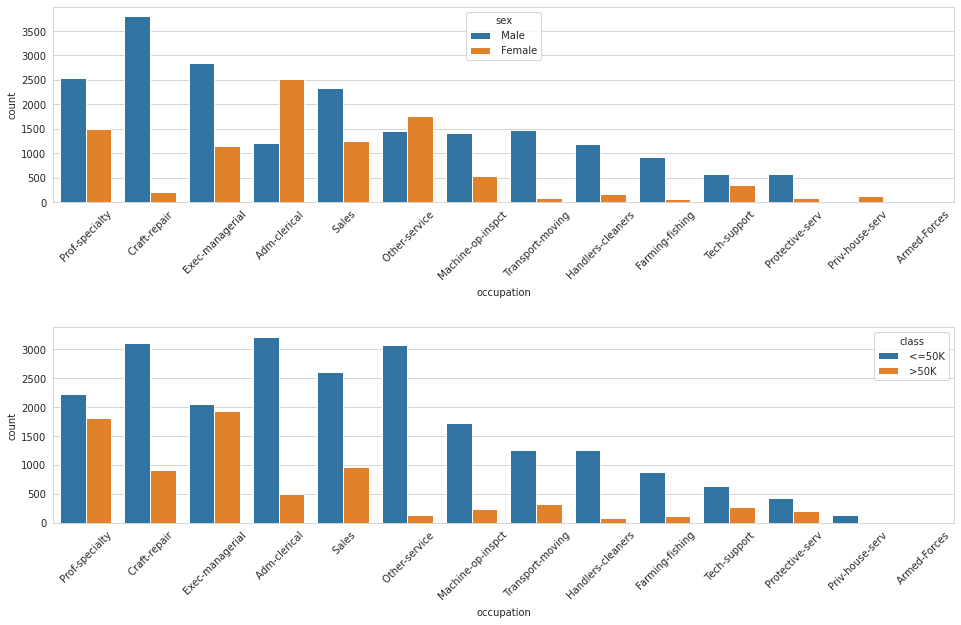

In [ ]:
fig = plt.figure(figsize=(14,8))

ax_1 = fig.add_subplot(211)
sns.countplot(x='occupation',hue='sex',palette='tab10',order=df_train['occupation'].value_counts().index,data=df_train,ax=ax_1)
plt.xticks(rotation=45)

fig.tight_layout(pad=3.0)

ax_2 = fig.add_subplot(212)
sns.countplot(x='occupation',hue='class',palette='tab10',order=df_train['occupation'].value_counts().index,data=df_train,ax=ax_2)
plt.xticks(rotation=45);

**Quantitative representation of data**

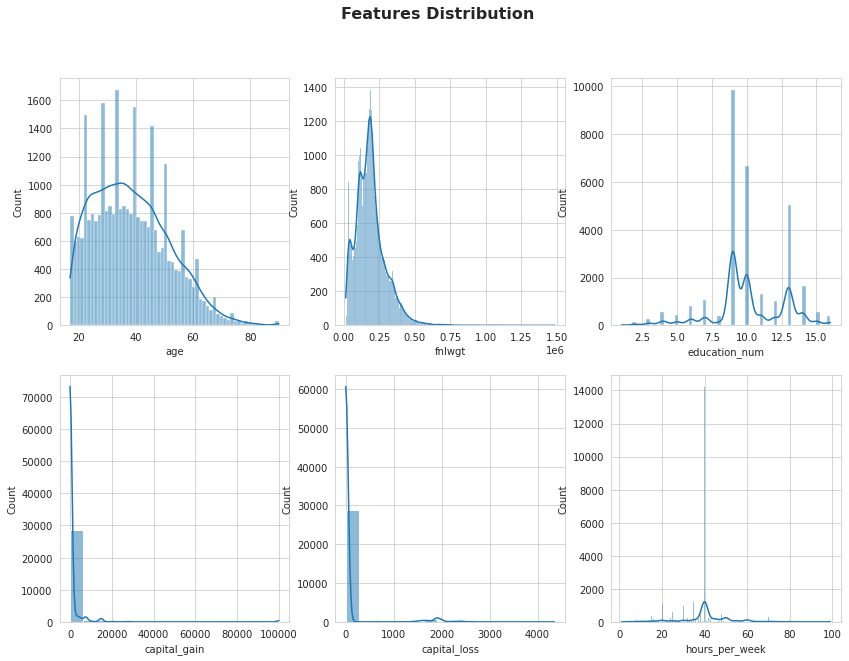

In [ ]:
quantitative = ['age', 'fnlwgt', 'education_num','capital_gain', 'capital_loss', 'hours_per_week']
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))
fig.suptitle('Features Distribution',fontsize=16,fontweight='bold')
for i, ax in enumerate(axes.flat):
    sns.histplot(df_train[quantitative].iloc[:,i],kde=True,ax=ax)

**Race of the workers**

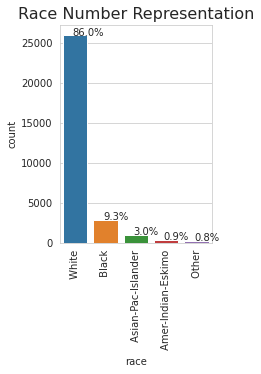

In [ ]:
fig = plt.figure()
ax_1 = fig.add_subplot(121)
plt.xticks(rotation=90)
plt.title('Race Number Representation',fontsize=16)
precent_plot(df_train,'race',ax_1)

**Final Weight Distribution**

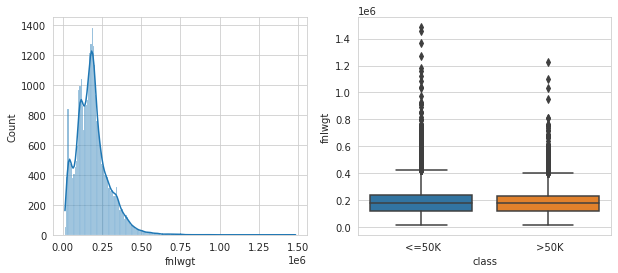

In [ ]:
fig = plt.figure(figsize=(10,4))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)

sns.histplot(df_train['fnlwgt'],kde=True,ax = ax_1)
sns.boxplot(data=df_train,x='class',y='fnlwgt',ax = ax_2);

**Label Encoding** #change

In [ ]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

d = defaultdict(LabelEncoder)

def encode(col):
    if col.dtype == 'object':
        return d[str(col)].fit_transform(col)
    else:
        return col 
    
df_train = df_train.apply(encode)
df_test = df_test.apply(encode)


**Displaying encoded data**

In [ ]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,37,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,37,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,37,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,37,0


In [ ]:
df_test

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,36,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,36,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,36,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,36,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,36,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,36,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,36,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,36,0


**Data Augmentation**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(df_train.drop(['class','fnlwgt'],axis=1),df_train['class'])
X_test, y_test = smote.fit_resample(df_test.drop(['class','fnlwgt'],axis=1),df_test['class'])
# print(y_balanced.value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

**Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# X_train,X_test,y_train,y_test = train_test_split(X_balanced, y_balanced,test_size=0.2,random_state=42)

tree = DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=42)
tree.fit(X_train,y_train)

print(f'Train accuracy: {accuracy_score(y_train,tree.predict(X_train))}')
print(f'Test accuracy:  {accuracy_score(y_test,tree.predict(X_test))}')
print(classification_report(y_test,tree.predict(X_test)))
trainAccuracies["Decision Tree Classifier"]=accuracy_score(y_train,tree.predict(X_train))
testAccuracies["Decision Tree Classifier"]=accuracy_score(y_test,tree.predict(X_test))

train accuracy: 0.8556965383085017
test accuracy:  0.8354776172012689
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     11348
           1       0.81      0.88      0.84     11348

    accuracy                           0.84     22696
   macro avg       0.84      0.84      0.84     22696
weighted avg       0.84      0.84      0.84     22696



**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(max_samples=0.05)
bagg.fit(X_train,y_train)

print(f'Train accuracy: {accuracy_score(y_train,bagg.predict(X_train))}')
print(f'Test accuracy:  {accuracy_score(y_test,bagg.predict(X_test))}')
print(classification_report(y_test,bagg.predict(X_test)))
trainAccuracies["Bagging Classifier"]=accuracy_score(y_train,bagg.predict(X_train))
testAccuracies["Bagging Classifier"]=accuracy_score(y_test,bagg.predict(X_test))

train accuracy: 0.8516954772536364
test accuracy:  0.8204088826224886
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     11348
           1       0.84      0.79      0.82     11348

    accuracy                           0.82     22696
   macro avg       0.82      0.82      0.82     22696
weighted avg       0.82      0.82      0.82     22696



**Random Forest Classifier**

train accuracy: 0.895508201069897
test accuracy:  0.8565826577370462
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     11348
           1       0.84      0.88      0.86     11348

    accuracy                           0.86     22696
   macro avg       0.86      0.86      0.86     22696
weighted avg       0.86      0.86      0.86     22696



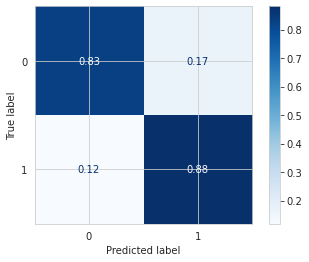

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=42)
model.fit(X_train,y_train)

print(f'Train accuracy: {accuracy_score(y_train,model.predict(X_train))}')
print(f'Test accuracy:  {accuracy_score(y_test,model.predict(X_test))}')
print(classification_report(y_test,model.predict(X_test)))
trainAccuracies["Random Forest Classifier"]=accuracy_score(y_train,model.predict(X_train))
testAccuracies["Random Forest Classifier"]=accuracy_score(y_test,model.predict(X_test))

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap=plt.cm.Blues,)
plt.show()

**Cat boost Classifier**

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=400,
    max_depth=3,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'])

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False)

print(f'Train accuracy: {accuracy_score(y_train,clf.predict(X_train))}')
print(f'Test accuracy:  {accuracy_score(y_test,clf.predict(X_test))}')
print(classification_report(y_test,clf.predict(X_test)))
trainAccuracies["Cat Boost Classifier"]=accuracy_score(y_train,clf.predict(X_train))
testAccuracies["Cat Boost Classifier"]=accuracy_score(y_test,clf.predict(X_test))

train accuracy: 0.8869313409080861
test accuracy:  0.8734578780401833
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11348
           1       0.86      0.89      0.88     11348

    accuracy                           0.87     22696
   macro avg       0.87      0.87      0.87     22696
weighted avg       0.87      0.87      0.87     22696



**K-NN Classifier**

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier())])
params = {
    'knn__n_neighbors': [23, 25, 27] 
}
grid = GridSearchCV(estimator=pipe,           
                  param_grid=params, 
                  cv=5,
                  return_train_score=False) # Turn on cv train scores
                  
grid_search = grid.fit(X_train, y_train)

neighbors = grid_search.best_params_['knn__n_neighbors']
print(grid_search.best_params_['knn__n_neighbors'])

  
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train,y_train)
y_test_hat=knn.predict(X_test) 
test_accuracy= accuracy_score(y_test,y_test_hat)

print("Accuracy")
print('Training accuracy : '+str(grid_search.best_score_))
print("Testing accuracy : "+str(test_accuracy))

23
Accuracy
Training accuracy : 0.8268718536081885
Testing accuracy : 0.7976295382446246


**ADA Classifier**

In [64]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=15)
clf.fit(X_train, y_train)

print(f'Train accuracy: {accuracy_score(y_train,clf.predict(X_train))}')
print(f'Test accuracy:  {accuracy_score(y_test,clf.predict(X_test))}')
print(classification_report(y_test,clf.predict(X_test)))
trainAccuracies["Cat Boost Classifier"]=accuracy_score(y_train,clf.predict(X_train))
testAccuracies["Cat Boost Classifier"]=accuracy_score(y_test,clf.predict(X_test))

Train accuracy: 0.8361996551571688
Test accuracy:  0.8395311949242157
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     11348
           1       0.82      0.86      0.84     11348

    accuracy                           0.84     22696
   macro avg       0.84      0.84      0.84     22696
weighted avg       0.84      0.84      0.84     22696



**Comaparison Table**

Classifer                  Test Accuracy

Decision Tree Classifier   0.8354776172012689

Bagging Classifier         0.8292650687345787

Random Forest Classifier   0.8565826577370462

Cat Boost Classifier       0.8734578780401833



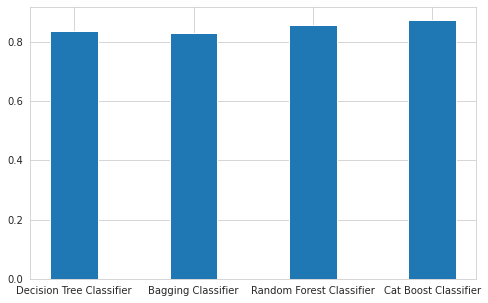



Classifer                  Train Accuracy

Decision Tree Classifier   0.8556965383085017

Bagging Classifier         0.8547017993722092

Random Forest Classifier   0.895508201069897

Cat Boost Classifier       0.8869313409080861



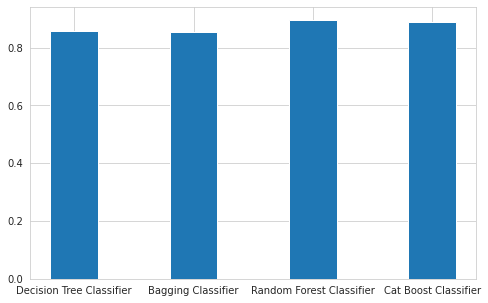

In [ ]:
print("{:<26} {:<10}\n".format('Classifer','Test Accuracy'))
for k, v in testAccuracies.items():
  num = v
  print("{:<26} {:<10}\n".format(k, num))

names = list(testAccuracies.keys())
values = list(testAccuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(range(len(testAccuracies)), values, tick_label=names, width=0.4)
plt.show()

print("\n\n{:<26} {:<10}\n".format('Classifer','Train Accuracy'))
for k, v in trainAccuracies.items():
  num = v
  print("{:<26} {:<10}\n".format(k, num))


names = list(trainAccuracies.keys())
values = list(trainAccuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(range(len(trainAccuracies)), values, tick_label=names, width=0.4)
plt.show()

In [ ]:
trainAccuracyTable = pd.DataFrame.from_dict(list(trainAccuracies.items()))
trainAccuracyTable.columns=['Classifiers','Training Accuracies']
print(trainAccuracyTable)

print('\n')
testAccuracyTable = pd.DataFrame.from_dict(list(testAccuracies.items()))
testAccuracyTable.columns=['Classifiers','Testing Accuracies']
print(testAccuracyTable)

                Classifiers  Training Accuracies
0  Decision Tree Classifier             0.855697
1        Bagging Classifier             0.854702
2  Random Forest Classifier             0.895508
3      Cat Boost Classifier             0.886931


                Classifiers  Testing Accuracies
0  Decision Tree Classifier            0.835478
1        Bagging Classifier            0.829265
2  Random Forest Classifier            0.856583
3      Cat Boost Classifier            0.873458


In [ ]:
accuracy = {
    'Classifiers' : ['Decision Tree','Bagging','Random Forest','Cat Boost','Ada Boost','KNN'],
    'Training' : [0.856293,0.855321,0.897255,0.881714,0.838101,0.827667],
    'Testing '  : [0.837460,0.830323,0.858081,0.871695,0.841690,0.801110]
}

df = pd.DataFrame(accuracy)
df

,Classifiers,Training,Testing
0,Decision Tree,0.856293,0.837460
1,Bagging,0.855321,0.830323
2,Random Forest,0.897255,0.858081
3,Cat Boost,0.881714,0.871695
4,Ada Boost,0.838101,0.841690
5,KNN,0.827667,0.801110
